                  Timestamp  Rainfall  Pumpflow     Volume  Event_ID
0 2018-08-12 04:00:00+00:00       0.0  0.611100  53.611256         1
1 2018-08-12 04:05:00+00:00       0.0  1.289800  55.248958         1
2 2018-08-12 04:10:00+00:00       0.0  1.689633  56.340760         1
3 2018-08-12 04:15:00+00:00       0.0  0.551333  60.162065         1
4 2018-08-12 04:20:00+00:00       0.0  1.640000  60.162065         1
1    433
6    337
3    241
2    205
5    193
4    181
Name: Event_ID, dtype: int64


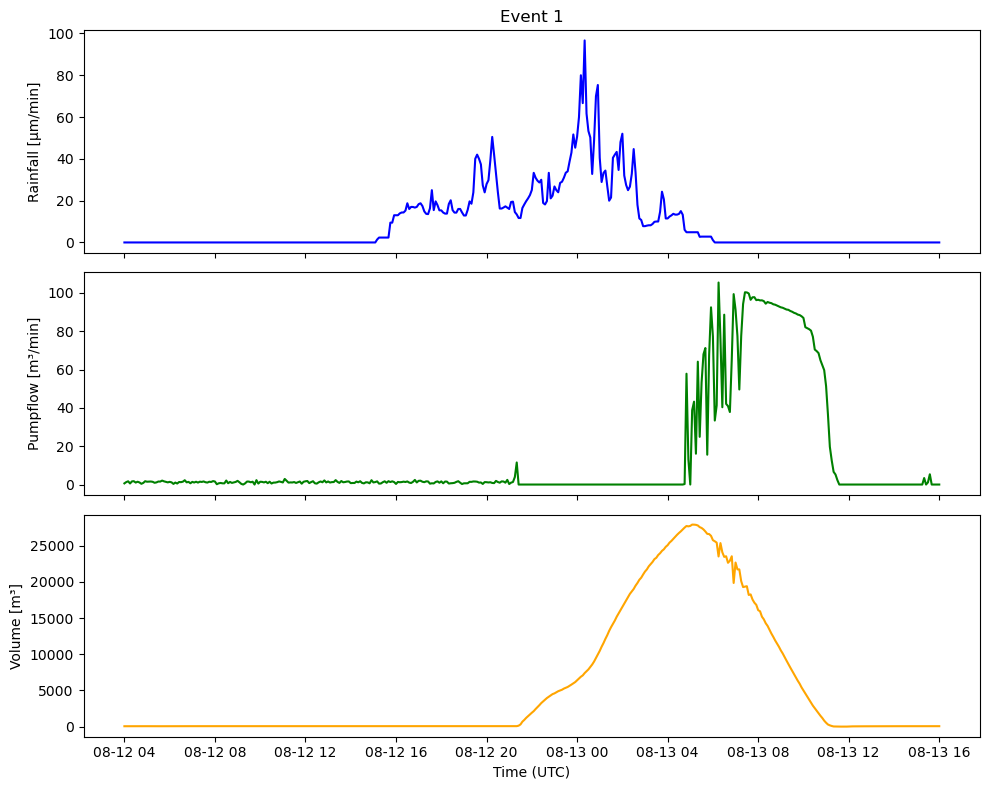

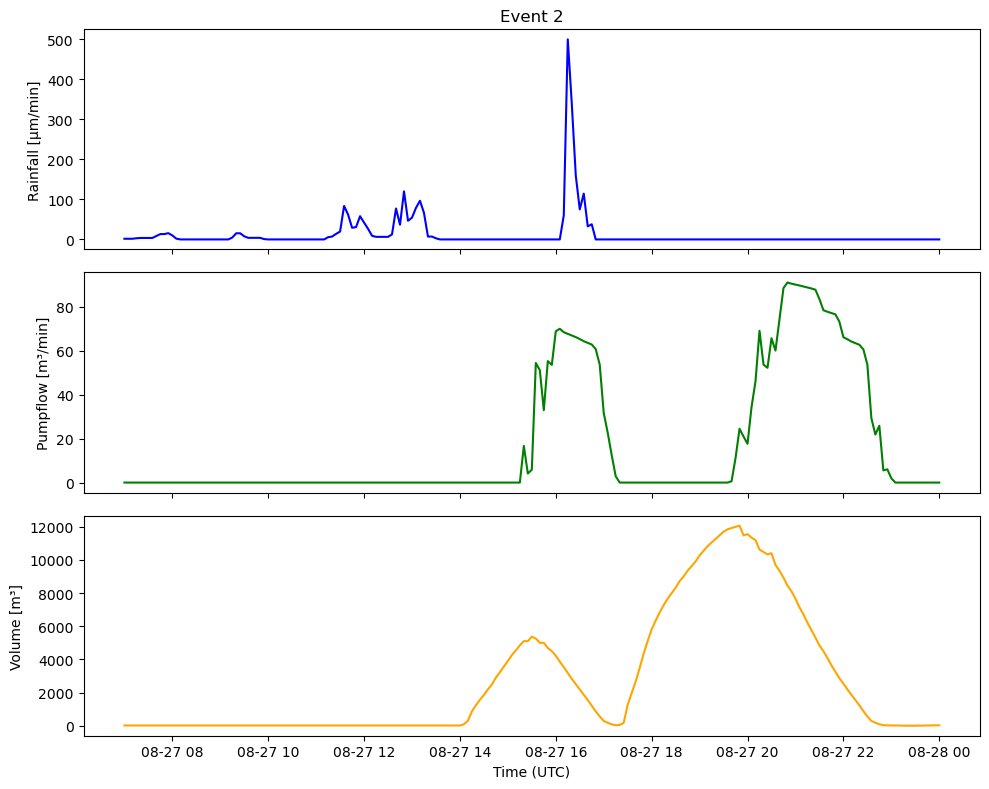

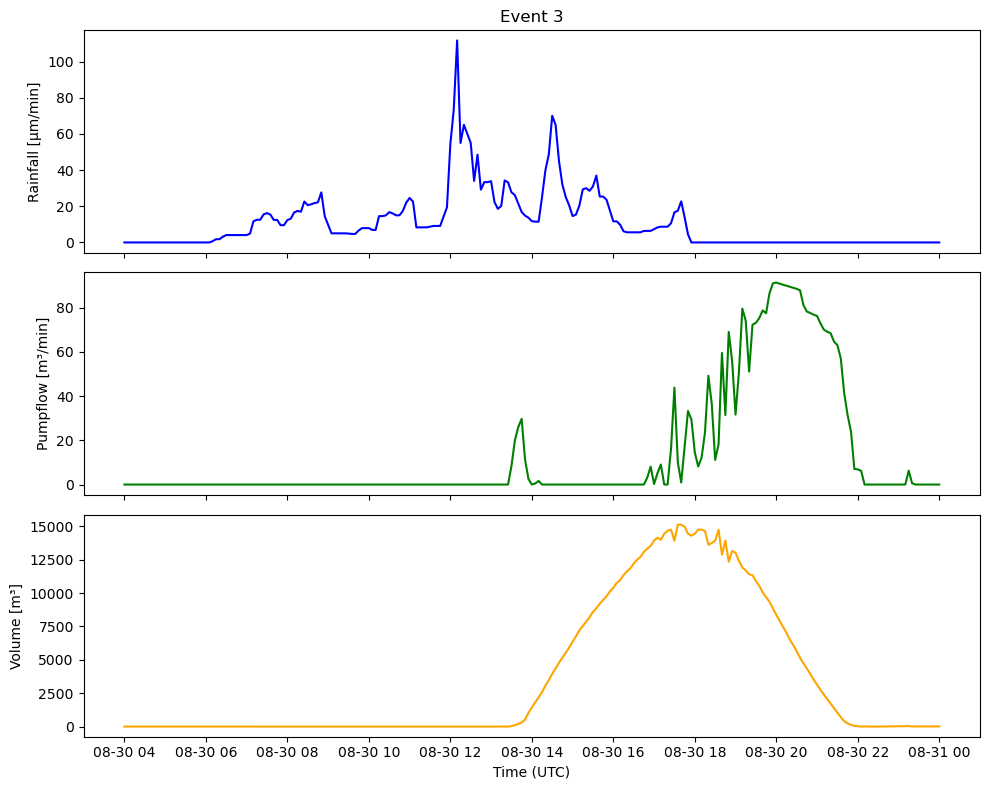

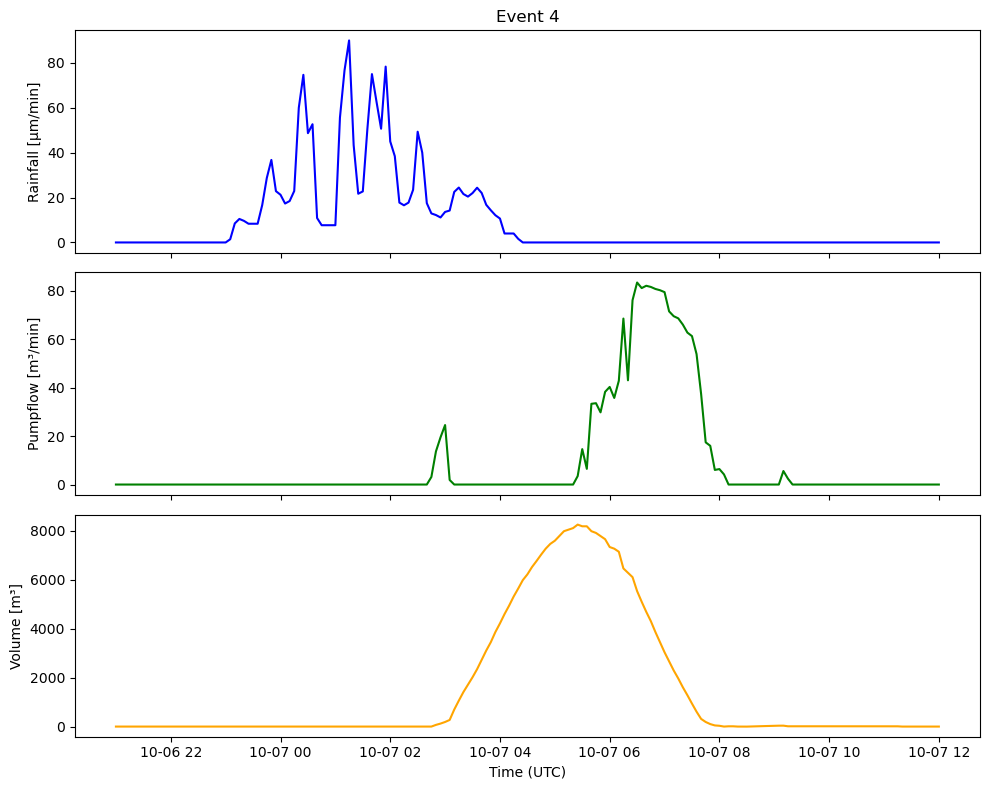

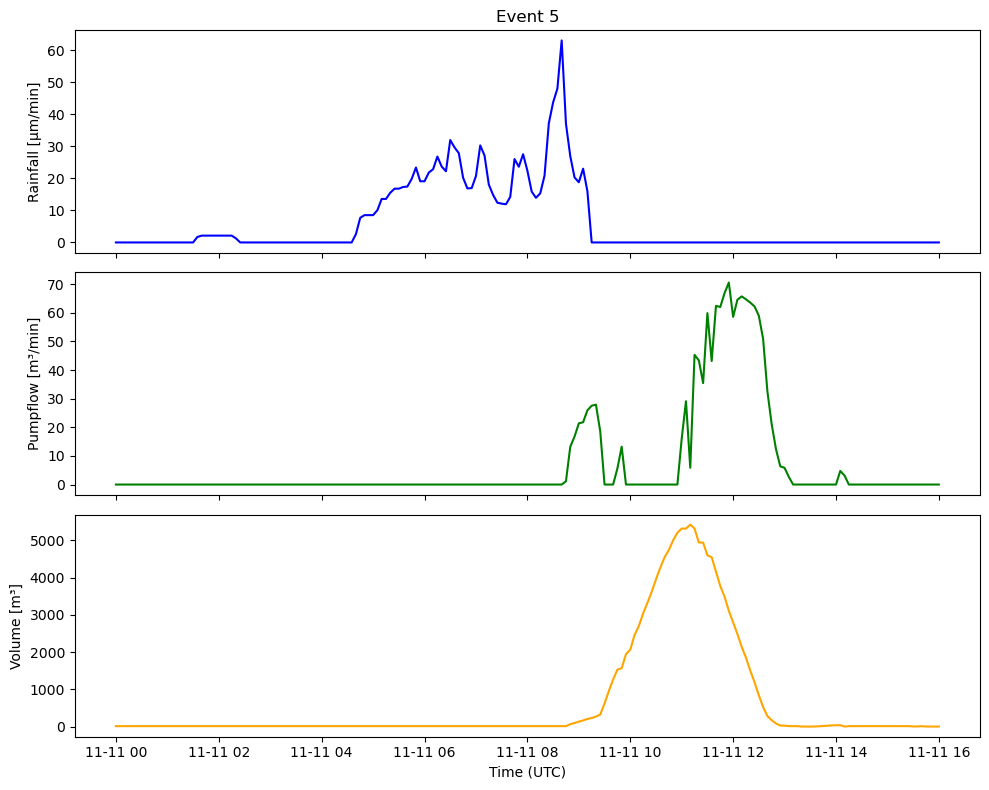

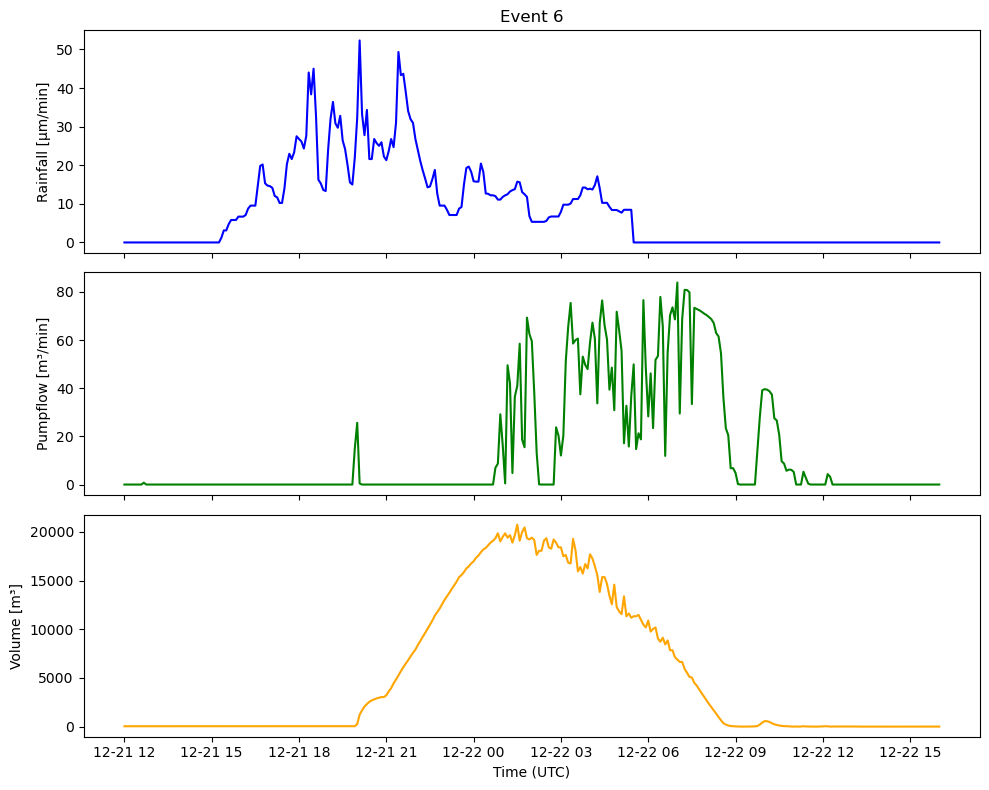

In [6]:
# Exercise 2.3.1 — Stormwater dataset (6 events)
import pandas as pd
import matplotlib.pyplot as plt

# --- Load dataset ---
# Make sure the file "ex3_largecase.csv" is in your working directory
df = pd.read_csv("ex3_largecase.csv")

# --- Parse and inspect ---
df["Timestamp"] = pd.to_datetime(df["Timestamp"], utc=True)
print(df.head())
print(df["Event_ID"].value_counts())

# --- Plot all 6 events ---
events = sorted(df["Event_ID"].unique())

for e in events:
    dfe = df[df["Event_ID"] == e]
    fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
    ax[0].plot(dfe["Timestamp"], dfe["Rainfall"], color="blue")
    ax[1].plot(dfe["Timestamp"], dfe["Pumpflow"], color="green")
    ax[2].plot(dfe["Timestamp"], dfe["Volume"], color="orange")
    ax[0].set_title(f"Event {e}")
    ax[2].set_xlabel("Time (UTC)")
    ax[0].set_ylabel("Rainfall [µm/min]")
    ax[1].set_ylabel("Pumpflow [m³/min]")
    ax[2].set_ylabel("Volume [m³]")
    plt.tight_layout()
    plt.show()

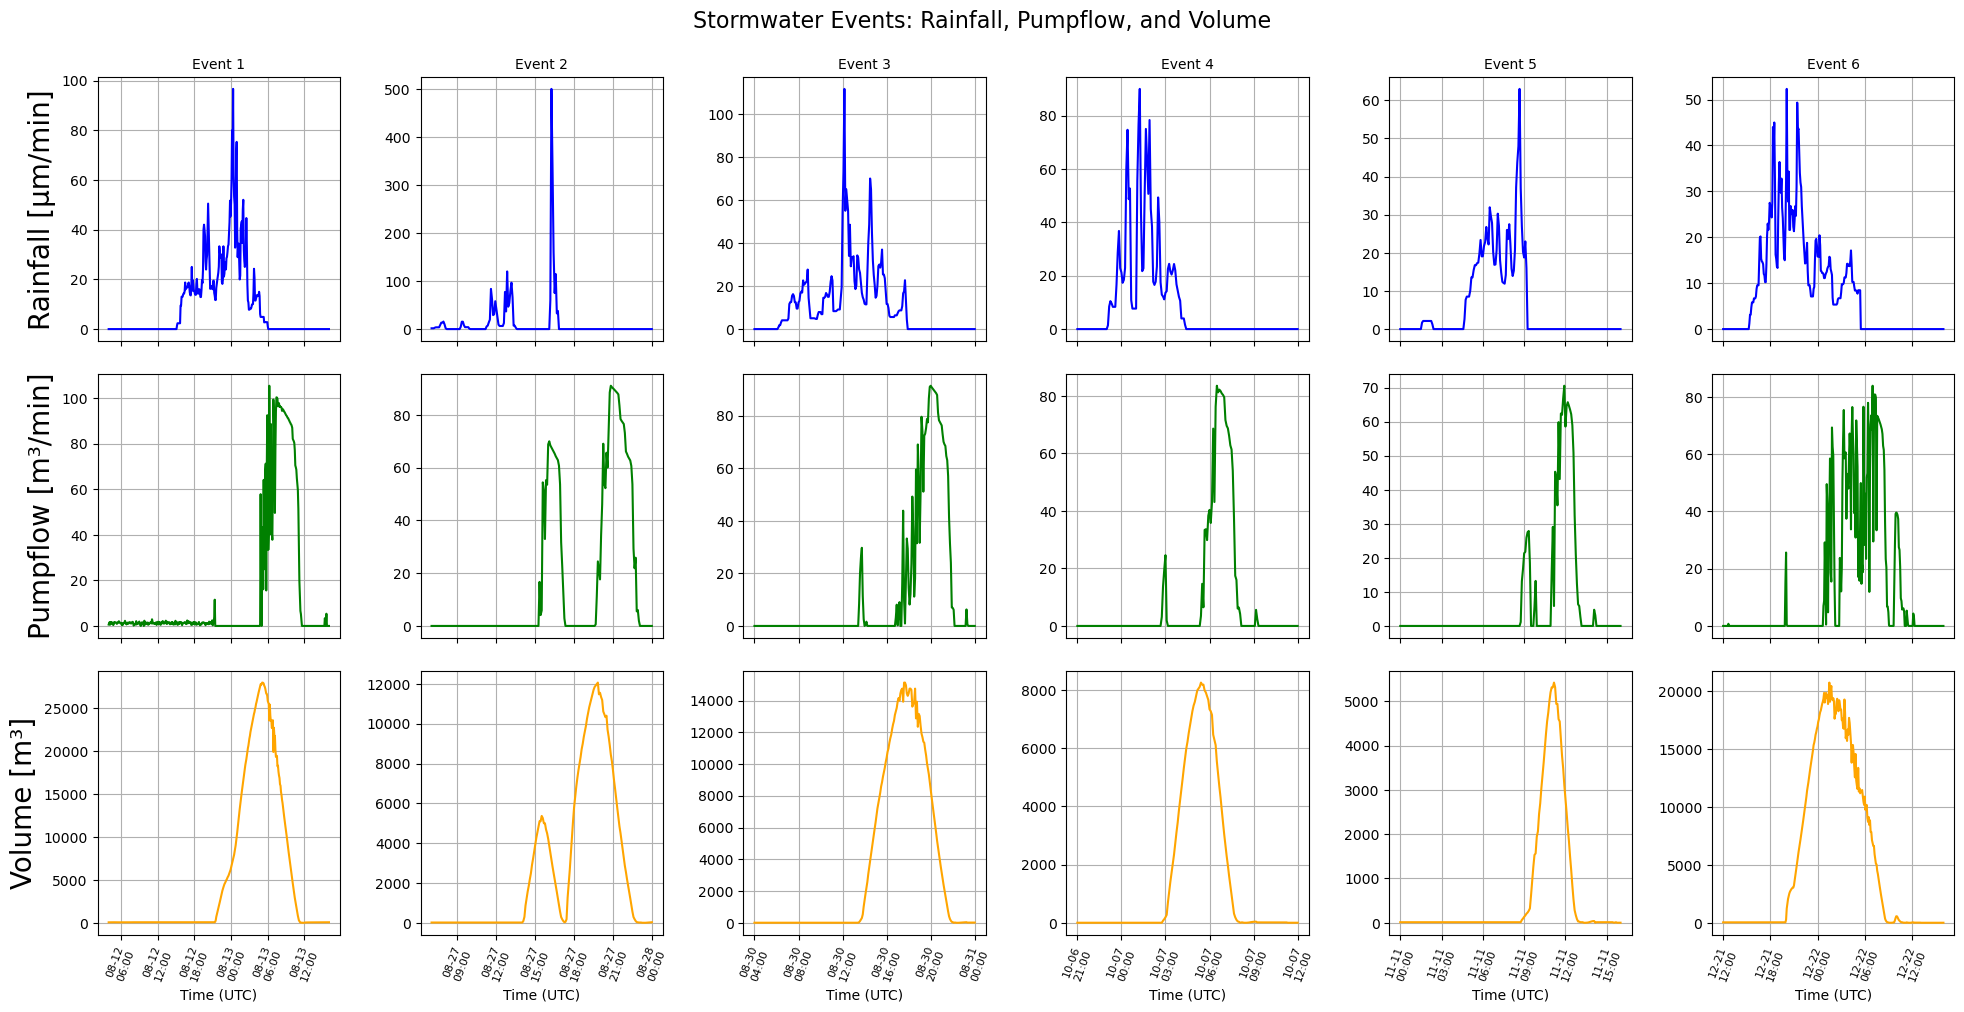

In [22]:
fig, axes = plt.subplots(3, len(events), figsize=(20, 10), sharex='col')

# Titles for rows
row_titles = ["Rainfall [µm/min]", "Pumpflow [m³/min]", "Volume [m³]"]

for j, e in enumerate(events):
    dfe = df[df["Event_ID"] == e]
    # Row 0 → Rainfall
    axes[0, j].plot(dfe["Timestamp"], dfe["Rainfall"], color="blue")
    # Row 1 → Pumpflow
    axes[1, j].plot(dfe["Timestamp"], dfe["Pumpflow"], color="green")
    # Row 2 → Volume
    axes[2, j].plot(dfe["Timestamp"], dfe["Volume"], color="orange")
    
    # Column titles (top row)
    axes[0, j].set_title(f"Event {e}", fontsize=10)
    
    # X-labels only on the bottom row
    axes[2, j].set_xlabel("Time (UTC)")

# Row labels on left-most column
for i in range(3):
    axes[i, 0].set_ylabel(row_titles[i], fontsize=20)

# Shared formatting
for ax in axes.flatten():
    ax.grid(True)

import matplotlib.dates as mdates

# Format timestamps compactly and reduce tick frequency
for ax in axes[2, :]:  # only bottom row has x-labels
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=8))  # show ~4 ticks
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d\n%H:%M'))  # short date + time
    for label in ax.get_xticklabels():
        label.set_rotation(70)
        label.set_fontsize(8)

plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=1.5)
fig.suptitle("Stormwater Events: Rainfall, Pumpflow, and Volume", fontsize=16, y=1.02)
plt.show()

